In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [12]:
gold_data = pd.read_csv('gld_price_data.csv')

In [13]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
gold_data.shape

(2290, 6)

In [15]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :
   
   1. Positive Correlation
   2. Negative Correlation

In [18]:
correlation = gold_data.corr()

/var/folders/6s/kxz9jf_11yx21882_h5nl_q40000gn/T/ipykernel_33204/1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

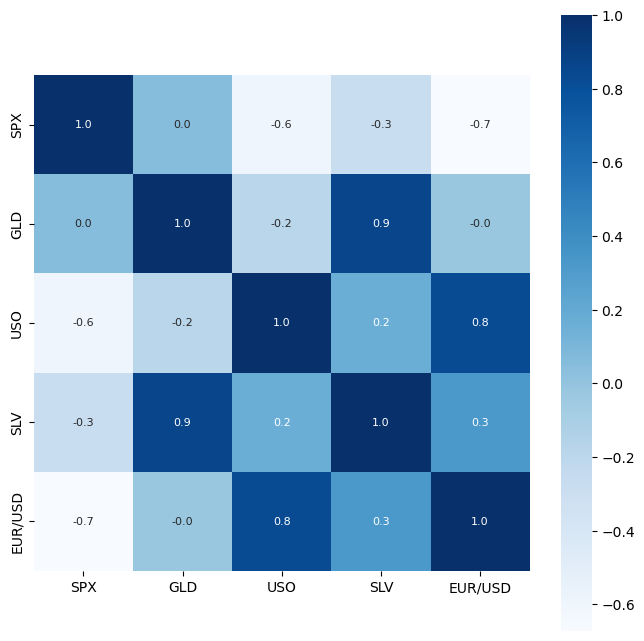

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [22]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/6s/kxz9jf_11yx21882_h5nl_q40000gn/T/ipykernel_33204/1232657234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

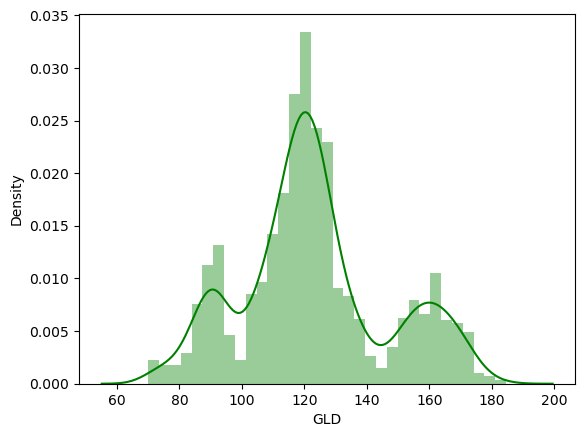

In [23]:
sns.distplot(gold_data['GLD'], color='green')

In [24]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

Model Training:

Random Forest Regressor

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [30]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [31]:
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[112.76010028 147.04980158 138.66029792 112.58560185 114.03889953
  95.47329954 111.79619987  93.35719941 120.86160084 127.24889964
 148.22730004 120.70139885 119.27580068  88.12860062  96.14740034
  92.85139862 116.81260064  88.93389895 125.15420101 114.90940006
 119.46649942 152.75810217 122.82209815 119.92330014 171.25769973
 108.22389864 120.50180058  87.15429803  88.10330057  88.44819901
 121.42500047 154.34310157 149.20239886 126.04659996 126.69010026
  90.90879884 158.57729942 121.48100156 106.68070078 144.15749689
  92.57349972 127.69290074 117.35710097 152.73570109 119.40539984
  91.14840141  79.85000005 120.32050154 132.04960082 119.12549992
 127.29860083 165.94529965 153.21890004  92.71329958 148.71449998
 151.99719868 113.07640072 112.82500049  87.28439915 127.7858991
 125.11580068 151.76900255 114.55300001 110.70040005 161.21949748
 117.20559839 108.52580091 131.58149993 133.01730218 125.41949995
 116.8766998  149.63220151 156.20180056 168.34739541 109.87480061
 140.650098

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [34]:
print(error_score)

0.9872051576441995


In [35]:
Y_test = list(Y_test)

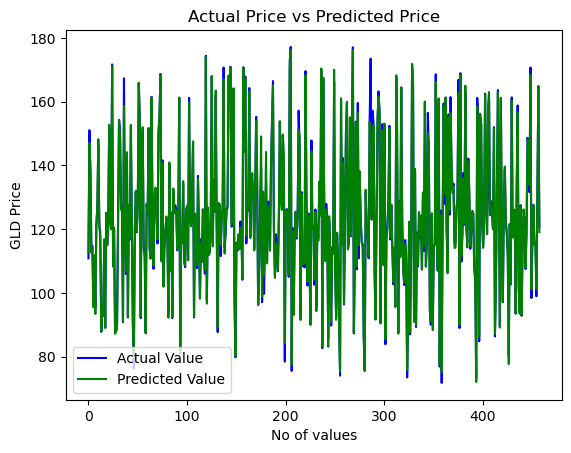

In [36]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Performing Regression model on this data

In [43]:
regression = LinearRegression()

In [44]:
regression.fit(X_train, Y_train)

LinearRegression()

In [45]:
#prediction using the training data
training_data_prediction = regression.predict(X_train)

In [46]:
# r2 test
error_score = metrics.r2_score(Y_train, training_data_prediction)

In [47]:
error_score

0.8841674321220663

In [48]:
#prediction using the test data
test_data_prediction = regression.predict(X_test)

In [49]:
# r2 test
error_score = metrics.r2_score(Y_test, test_data_prediction)
error_score

0.8696713120900417